# Numpy -  arrays multidimensionales de datos 

J.R. Johansson (jrjohansson at gmail.com) traducido por P. Gzlez. Rodelas (prodelas at gmail.com)
La última versión de este IPython notebook se encuentra disponible en http://github.com/jrjohansson/scientific-python-lectures.
Otros notebooks de la misma serie están indexados en http://jrjohansson.github.io.

In [52]:
# Para consultar el objetivo de estas sentencias consultar la Lecture 4 
# en  http://jrjohansson.github.io.
%matplotlib inline
import matplotlib.pyplot as plt

## Introducción

El paquete (módulo) `numpy` será usado en casi todos los cálculos numéricos con Python. Es un paquete que proporciona la posibilidad de usar vectores de alto rendimiento, matrices y estructuras de datos multidimensionales para Python. Está implementado en C y Fortran, de manera que los cálculos pueden ser vectorizados (formulados con vectores y matrices), para mejorar enormemente el
rendimiento. 

Para poder usar `numpy` se necesita importar previamente dicho módulo, usando por ejemplo:

In [3]:
from numpy import *

En el paquete `numpy` la terminología usada para los vectores, matrices y otros conjuntos de datos multi-dimensionales será la de *array*. 



## Creando arrays con `numpy` 

Hay diferentes maneras de inicializar nuevos arrays en numpy, por ejemplo a partir

* una lista o tupla de Python
* usando funciones dedicadas a generar arrays en numpy, tales como `arange`, `linspace`, etc.
* leyendo datos a partir de ficheros

### A partir de listas

Por ejemplo, para crear un nuevo vector y una matriz de tipo array como listas en Python podemos usar la función `numpy.array`.

In [4]:
# un vector: el argumento de la función array será una lista de Python
v = array([1,2,3,4])

v

array([1, 2, 3, 4])

In [5]:
# una matriz: el argumento de la función array será en este caso 
# una lista anidada de Python
M = array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

Los objetos `v` y `M` son ambos de tipo `ndarray`, que proporciona el módulo `numpy`.

In [6]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

La diferencia entre los arrays `v` y `M` radica sólo en sus dimensiones ("shapes" en inglés). Podemos obtener información acerca de las dimensiones de un array usando la propiedad `ndarray.shape`.

In [7]:
v.shape

(4L,)

In [7]:
M.shape

(2L, 2L)

Por otra parte, el número de elementos en el array también está disponible gracias a la propiedad `ndarray.size`:

In [8]:
M.size

4

Equivalentemente, también podríamos haber usado las funciones `numpy.shape` y `numpy.size`

In [9]:
shape(M)

(2L, 2L)

In [10]:
size(M)

4

Hasta el momento cualquier elemento del tipo `numpy.ndarray` tiene todo el aspecto de una lista (simple o anidada) de Python. Entonces, ¿por qué no usar simplemente las listas de Python para todos los cálculos en vez de crear un nuevo tipo de objeto denominado array?

Hay varias razones para ello:

* En primer lugar, las listas de Python son bastante generales. Pueden contener cualquier tipo de objectos, también poseen tipado dinámico, pero el gran inconveniente es que no soportan la acción de funciones matemáticas, como por ejemplo la multiplicación de matrices, producto escalar, etc. Por otro lado, la implementación de tales funciones para las listas de Python no hubiera resultado nada eficiente debido precisamente a este tipado dinámico.
* Contrariamente a esto, los arrays en Numpy están **tipados estáticamente ** y son **homogéneos**. Es decir, el tipo de los elementos está determinado cuando el array es creado.
* De esta manera los arrays de Numpy gestionan mucho mejor la memoria.
* Debido al tipado estático, implementaciones bastante rápidas de las funciones matemáticas, como la multiplicación y la suma de arrays de `numpy`  puede realizarse en un lenguaje compilado (C y Fortran).

Usando la propiedad `dtype` (data type) de un `ndarray`, podemos ver que tipo  de datos tiene un array:

In [10]:
M.dtype

dtype('int32')

Obtendremos un error si intentamos asignarle un valor de tipo equivocado a un elemento de un array de numpy:

In [1]:
# M[0,0] = "hello"

Si queremos, podemos definir explícitamente el tipo de dato de un array cuando lo creamos, usando la palabra `dtype` como argumento: 

In [12]:
M = array([[1, 2], [3, 4]], dtype=complex)

M

array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

Tipos de dato comunes que pueden ser usados con `dtype` son: `int`, `float`, `complex`, `bool`, `object`, etc.

También podemos definir explícitamente el tamaño en bits del tipo de dato en cuestión, por ejemplo: `int64`, `int16`, `float128`, `complex128`.

### Usando funciones generadoras de  arrays

Para arrays más grandes sería poco práctico inicializar sus elementos manualmente, usando listas explícitas de python. En vez de esto podemos usar alguna de las muchas funciones en `numpy` que permiten generar arrays de diferentes formas. Algunas de las más comunes son:

#### arange

In [14]:
# crea una lista con valores en un determinado rango

x = arange(0, 10, 1) # argumentos: inicio, fin, paso

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
x = arange(-1, 1, 0.1)

x

array([ -1.00000000e+00,  -9.00000000e-01,  -8.00000000e-01,
        -7.00000000e-01,  -6.00000000e-01,  -5.00000000e-01,
        -4.00000000e-01,  -3.00000000e-01,  -2.00000000e-01,
        -1.00000000e-01,  -2.22044605e-16,   1.00000000e-01,
         2.00000000e-01,   3.00000000e-01,   4.00000000e-01,
         5.00000000e-01,   6.00000000e-01,   7.00000000e-01,
         8.00000000e-01,   9.00000000e-01])

#### linspace and logspace

In [16]:
# using linspace, both end points ARE included
linspace(0, 10, 25)

array([  0.        ,   0.41666667,   0.83333333,   1.25      ,
         1.66666667,   2.08333333,   2.5       ,   2.91666667,
         3.33333333,   3.75      ,   4.16666667,   4.58333333,
         5.        ,   5.41666667,   5.83333333,   6.25      ,
         6.66666667,   7.08333333,   7.5       ,   7.91666667,
         8.33333333,   8.75      ,   9.16666667,   9.58333333,  10.        ])

In [17]:
logspace(0, 10, 10, base=e)

array([  1.00000000e+00,   3.03773178e+00,   9.22781435e+00,
         2.80316249e+01,   8.51525577e+01,   2.58670631e+02,
         7.85771994e+02,   2.38696456e+03,   7.25095809e+03,
         2.20264658e+04])

#### mgrid

In [17]:
x, y = mgrid[0:5, 0:5] # similar al comando meshgrid en MATLAB

In [18]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [19]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### datos aleatorios

In [20]:
from numpy import random

In [21]:
#  números aleatorios uniformemente distribuidos en [0,1]
random.rand(5,5)

array([[ 0.87954224,  0.59945009,  0.87596762,  0.04194328,  0.2404041 ],
       [ 0.53473694,  0.31422964,  0.09550388,  0.50046167,  0.55572169],
       [ 0.43391733,  0.50800642,  0.19282335,  0.06914001,  0.20847304],
       [ 0.173921  ,  0.33127663,  0.10203446,  0.8542553 ,  0.31755335],
       [ 0.85178045,  0.38247035,  0.82698906,  0.87806111,  0.84536605]])

In [21]:
# números aleatorios distribuidos según una normal estándar
random.randn(5,5)

array([[ 1.14412956, -0.60349476,  1.22915561, -1.98042988, -0.12764419],
       [ 0.85139389,  0.19730998, -0.05352145,  0.19445628, -1.91168013],
       [ 1.28614109,  1.1397746 , -1.43917587, -0.39052612,  0.95644097],
       [-0.9515328 , -1.13197956,  0.44157847,  0.45750167, -0.46503805],
       [ 0.65617713,  0.01065993, -0.74410074,  0.72407782, -1.27914141]])

#### diag

In [22]:
# una matriz diagonal
diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [23]:
# valores en una diagonal por encima de la diagonal principal
diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### ceros y unos

In [24]:
zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [25]:
ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

## Operaciones de Entrada/Salida (I/O, de Input/Output en inglés)

### Valores Separados por Comas (CSV abreviatura en inglés)

Un formato muy común para los ficheros de datos numéricos son los valores separados por comas (formato CSV, del inglés "comma-separated values"), u otros formatos relacionados tales como separados por tabulador (TSV, del inglés "tab-separated values"). Para leer datos de este tipo de ficheros en un array de Numpy podemos usar la función `numpy.genfromtxt`. Por ejemplo, 

In [47]:
# pwd

'/Users/pedrogonzalez/Dropbox/Titularidad/MiProyecto/Python/Sesion_5'

In [48]:
ls  *.dat

stockholm_td_adj.dat


In [4]:
# !more stockholm_td_adj.dat # head

In [49]:
data = genfromtxt('stockholm_td_adj.dat')

In [50]:
data.shape

(77431, 7)

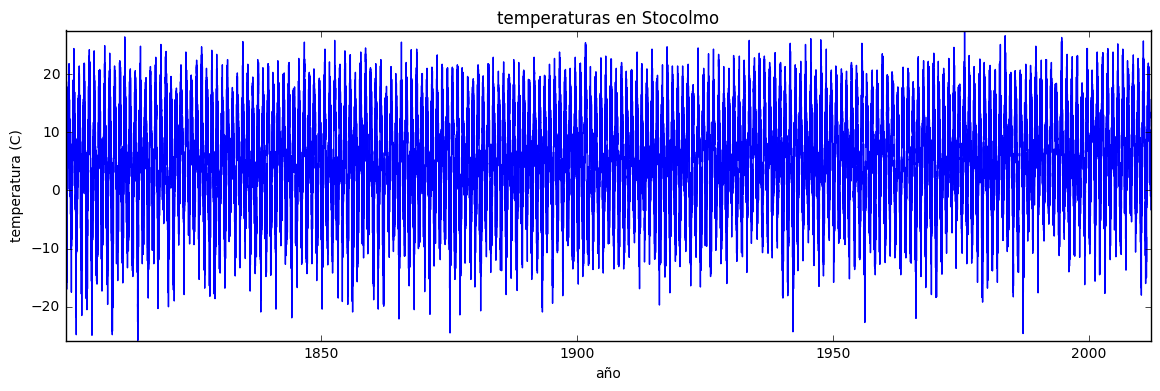

In [53]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('temperaturas en Stocolmo')
ax.set_xlabel('año')
ax.set_ylabel('temperatura (C)');

Usando `numpy.savetxt` podemos almacenar un array de Numpy en un fichero en formato CSV:

In [4]:
M = random.rand(3,3)

M

array([[ 0.88660049,  0.72470766,  0.2570689 ],
       [ 0.435238  ,  0.45412059,  0.21088217],
       [ 0.46232514,  0.38822981,  0.13342035]])

In [31]:
savetxt("random-matrix.csv", M)

In [5]:
# !type random-matrix.csv      # cat

In [6]:
# savetxt("random-matrix.csv", M, fmt='%.5f') # fmt especifica el formato

# !type random-matrix.csv      # cat

### Ficheros con el formato nativo de  Numpy 

Será útil cuando se almacena y se vuelven a leer bastantes datos en arrays de NumPy, usando las funciones `numpy.save` y `numpy.load`, respectivamente:

In [7]:
# save("random-matrix.npy", M)

# !file random-matrix.npy

In [38]:
load("random-matrix.npy")

array([[ 0.09733419,  0.01316246,  0.91242918],
       [ 0.35736573,  0.95141793,  0.81489628],
       [ 0.0468611 ,  0.59532589,  0.87974641]])

## Más propiedades de los arrays de NumPy

In [39]:
M.itemsize # bytes por elemento

8

In [40]:
M.nbytes # número de bytes

72

In [41]:
M.ndim # número de dimensiones

2

## Manipulando arrays

### Indexado

Podemos indexar elementos en un array usando corchetes y los correspondientes índices (¡recordar que el primer índice siempre será 0!):

In [42]:
v

array([1, 2, 3, 4])

In [43]:
#  como v es un vector, tiene una sola dimensión, y podrá usarse un sólo índice
v[0], v[1]

(1, 2)

In [44]:
# M sin embargo es una matriz, o array bidimensional, con dos índices 
M[1,1]

0.95141792963639116

In [41]:
M

array([[ 0.57858868,  0.66438318,  0.00444915],
       [ 0.59472631,  0.18850621,  0.73985337],
       [ 0.00137733,  0.19255711,  0.84949798]])

In [45]:
# Si omitimos uno de los índices de un array multidimensional 
# obtendremos la fila completa (o en general, un array N-1 dimensional
M[1]

array([ 0.35736573,  0.95141793,  0.81489628])

Lo mismo se podría obtener usando `:` en vez de un índice: 

In [46]:
M[0,:] # fila con índice 0 (en realidad es la primera fila)

array([ 0.09733419,  0.01316246,  0.91242918])

In [44]:
M[1,:] # fila con índice 1 (en realidad es la segunda fila)

array([ 0.59472631,  0.18850621,  0.73985337])

In [47]:
M[:,0] # columna con índice 0 (primera columna)

array([ 0.09733419,  0.35736573,  0.0468611 ])

In [46]:
M[:,1] # columna con índice 1 (segunda)

array([ 0.66438318,  0.18850621,  0.19255711])

Podemos asignar nuevos valores a elementos en un array usando los índices adecuados:

In [48]:
M[0,0] = 1

In [49]:
M

array([[ 1.        ,  0.01316246,  0.91242918],
       [ 0.35736573,  0.95141793,  0.81489628],
       [ 0.0468611 ,  0.59532589,  0.87974641]])

In [50]:
# también funciona con filas o columnas completas
M[1,:] = 0
M[:,2] = -1

In [51]:
M

array([[ 1.        ,  0.01316246, -1.        ],
       [ 0.        ,  0.        , -1.        ],
       [ 0.0468611 ,  0.59532589, -1.        ]])

### Índices rebanados ("Index slicing")

Este sería el nombre técnico para la sintaxis `M[inferior:superior:paso]` para extraer parte de un array:

In [52]:
A = array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [53]:
A[1:3]

array([2, 3])

Estas rebanadas de array son *mutables*: es decir, se les puede asignar valores diferentes a los originales, modificando así el array en sí:

In [54]:
A[1:3] = [-2,-3]

A

array([ 1, -2, -3,  4,  5])

De hecho podríamos omitir cualquiera de los tres parámetros en `M[inferior:superior:paso]`:

In [55]:
A[::] 
# Aquí inferior, superior y paso toman todos el valor que permite recuperar A 

array([ 1, -2, -3,  4,  5])

In [55]:
A[::2] #  Aquí paso es 2, mientras que inferior y superior siguen tomando los
# valores que tenían de antemano

array([ 1, -3,  5])

In [56]:
A[:3] # Aquí se mostrarán los tres primeros elementos

array([ 1, -2, -3])

In [57]:
A[3:] # Aquí los elementos a partir del índice 3 (es decir el 4 y el 5)

array([4, 5])

Los índices negativos cuentan desde el final del array (los positivos desde el principio):

In [57]:
A = array([1,2,3,4,5])

In [58]:
A[-1] # Indica el último elemento del array

5

In [60]:
A[-3:] # Indica los 3 últimos elementos

array([3, 4, 5])

Esta técnica funciona exactamente igual para arrays multidimensionales:

In [10]:
A = array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [62]:
# Extraemos un bloque del array original
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [60]:
# "a zancadas" ("strides" en inglés)
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Indexado de lujo o personalizado ("Fancy  indexing") 

Este suele ser el término empleado cuando otro array o lista es usada en lugar de un índice normal: 

In [61]:
indices_fila = [1, 2, 3]
A[indices_fila]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [62]:
indices_columna = [1, 2, -1] 
# recuérdese que el índice -1 hace referencia al último elemento
A[indices_fila, indices_columna]

array([11, 22, 34])

Incluso podemos usar índices máscara de manera que si este índice máscara en un array de Numpy de tipo `bool`, entonces un elemento será seleccionado (True) o no (False), dependiendo del valor del índice máscara en la posición de cada elemento: 

In [63]:
B = array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [67]:
mascara_fila = array([True, False, True, False, False])
B[mascara_fila]

array([0, 2])

In [64]:
# otra forma de hacer lo mismo
mascara_fila = array([1,0,1,0,0], dtype=bool)
B[mascara_fila]

array([0, 2])

Esta característica es muy útil para poder seleccionar condicionalmente elementos de un array, usando por ejemplo operadores de comparación:

In [65]:
x = arange(0, 10, 0.5)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [5]:
#  5 < x < 7.5  esta sentencia no sería válida

In [66]:
5 < x

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

In [72]:
x < 7.5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False], dtype=bool)

In [67]:
mascara = (5 < x) * (x < 7.5)

mascara

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False], dtype=bool)

In [74]:
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [68]:
x[mascara]

array([ 5.5,  6. ,  6.5,  7. ])

## Funciones para extraer datos a partir de arrays para crear nuevos arrays

### where

Los índices máscara pueden convertirse en índices de posición usando la función `where`

In [69]:
indices = where(mascara)

indices

(array([11, 12, 13, 14], dtype=int64),)

In [70]:
x[indices] # esta indexación es equivalente al indexado x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

### diag

Con la función `diag` también podemos extraer la diagonal y subdiagonales de un array:

In [71]:
diag(A)

array([ 0, 11, 22, 33, 44])

In [72]:
diag(A, -1)

array([10, 21, 32, 43])

In [73]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [74]:
diag(A, 1)

array([ 1, 12, 23, 34])

### take

La función `take` es similar al indexado descrito más arriba:

In [75]:
v2 = arange(-3,3)
v2

array([-3, -2, -1,  0,  1,  2])

In [76]:
indices = [1, 3, 5]
v2[indices] #  indexado personalizado

array([-2,  0,  2])

In [77]:
v2.take(indices)

array([-2,  0,  2])

Pero `take` también funciona con listas y otros objetos:

In [78]:
take([-3, -2, -1,  0,  1,  2], indices)

array([-2,  0,  2])

### choose

Construye un array tomando elementos de varios arrays:
by picking elements from several arrays:

In [79]:
cual = [1, 0, 1, 0]
opciones = [[-2,-2,-2,-2], [5,5,5,5]]

choose(cual, opciones)

array([ 5, -2,  5, -2])

## Álgebra lineal

La vectorización de código es una de las claves para escribir programas de cálculo numérico eficientes con Python/Numpy. Esto quiere decir que en la medida de lo posible, un programa debería de formularse en términos de operaciones con matrices y vectores, como una multiplicación matrix-vector por ejemplo.

### Operaciones de tipo escalar-array 

Podemos usar los operadores aritméticos usuales (de suma, resta y división de arrays con escalares numéricos). 

In [6]:
v1 = arange(0, 5)

In [7]:
v1 * 2

array([0, 2, 4, 6, 8])

In [8]:
v1 + 2

array([2, 3, 4, 5, 6])

In [11]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [12]:
A * 2

array([[ 0,  2,  4,  6,  8],
       [20, 22, 24, 26, 28],
       [40, 42, 44, 46, 48],
       [60, 62, 64, 66, 68],
       [80, 82, 84, 86, 88]])

In [13]:
A + 2

array([[ 2,  3,  4,  5,  6],
       [12, 13, 14, 15, 16],
       [22, 23, 24, 25, 26],
       [32, 33, 34, 35, 36],
       [42, 43, 44, 45, 46]])

###  Operaciones de tipo array-array, elemento a elemento

Podemos sumar, substraer, multiplicar y dividir arrays entre ellas, siendo la operación **elemento a elemento** el comportamiento por defecto:

In [14]:
A * A # multiplicación elemento a elemento

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [15]:
v1

array([0, 1, 2, 3, 4])

In [16]:
v1 * v1

array([ 0,  1,  4,  9, 16])

También si multiplicamos arrays con dimensiones compatibles, obtendremos multiplicaciones elemento a elemento de cada una de las filas:

In [17]:
A.shape, v1.shape

((5, 5), (5,))

In [18]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

### Álgebra matricial

¿Cómo efectuar pues la multiplicación matricial? Hay dos maneras de hacerlo: usando la función `dot`, que permite aplicar una multiplicación de tipo matriz-matriz, matriz-vector o bien un producto escalar entre dos vectores:

In [19]:
dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [20]:
dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [21]:
dot(v1, v1)

30

Alternativamente, podemos convertir un objeto array al tipo de datos `matrix`. Esto cambia el comportamiento de los operadores aritméticos `+, -, *` para que usen el álgebra matricial usual.

In [23]:
M = matrix(A)
v = matrix(v1).T # esto hace de este array unidimensional 
# un vector columna 

In [24]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [25]:
M * M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [26]:
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [27]:
# una forma de calcular el producto escalar
(v.T * v)[0,0]

30

In [28]:
# con estos objectos de tipo matrix se aplicará el álgebra matricial usual 
v + M*v

matrix([[ 30],
        [131],
        [232],
        [333],
        [434]])

Con este tipo de objetos, si intentamos sumar, sustraer o multiplicar objetos de dimensiones incompatibles obtendremos un error:

In [29]:
v = matrix([1,2,3,4,5,6]).T

In [30]:
v

matrix([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

In [31]:
shape(M), shape(v)

((5, 5), (6, 1))

In [33]:
#  M * v  Esta orden provocaría un error

Ver también las funciones relacionadas: `inner`, `outer`, `cross`, `kron`, `tensordot`.

In [34]:
help(tensordot)

Help on function tensordot in module numpy.core.numeric:

tensordot(a, b, axes=2)
    Compute tensor dot product along specified axes for arrays >= 1-D.
    
    Given two tensors (arrays of dimension greater than or equal to one),
    `a` and `b`, and an array_like object containing two array_like
    objects, ``(a_axes, b_axes)``, sum the products of `a`'s and `b`'s
    elements (components) over the axes specified by ``a_axes`` and
    ``b_axes``. The third argument can be a single non-negative
    integer_like scalar, ``N``; if it is such, then the last ``N``
    dimensions of `a` and the first ``N`` dimensions of `b` are summed
    over.
    
    Parameters
    ----------
    a, b : array_like, len(shape) >= 1
        Tensors to "dot".
    
    axes : int or (2,) array_like
        * integer_like
          If an int N, sum over the last N axes of `a` and the first N axes
          of `b` in order. The sizes of the corresponding axes must match.
        * (2,) array_like
          

### Transformaciones de tipo Array/Matrix

Más arriba hemos usado el operador `.T` que transpone el objecto matriz `v`, aunque también podemos usar la función `transpose` para obtener el mismo resultado. 

Otras funciones matemáticas que se pueden aplicar para transformar de alguna manera un objeto de tipo matrix son:

In [35]:
C = matrix([[1j, 2j], [3j, 4j]])
C

matrix([[ 0.+1.j,  0.+2.j],
        [ 0.+3.j,  0.+4.j]])

In [36]:
conjugate(C)

matrix([[ 0.-1.j,  0.-2.j],
        [ 0.-3.j,  0.-4.j]])

Conjugada Hermitiana: transpuesta conjugada

In [37]:
C.H

matrix([[ 0.-1.j,  0.-3.j],
        [ 0.-2.j,  0.-4.j]])

Por otro lado también podemos extraer la parte real o imaginaria de un array o matriz compleja usando las funciones habituales `real` e `imag`:

In [38]:
real(C) # lo mismo que con: C.real

matrix([[ 0.,  0.],
        [ 0.,  0.]])

In [39]:
imag(C) # lo mismo que con: C.imag

matrix([[ 1.,  2.],
        [ 3.,  4.]])

O el argumento y módulo de un número complejo

In [40]:
# para usuarios de MATLAB, nótese que usamos 
angle(C+1) #  'angle' en vez de 'arg'

array([[ 0.78539816,  1.10714872],
       [ 1.24904577,  1.32581766]])

In [41]:
abs(C)

matrix([[ 1.,  2.],
        [ 3.,  4.]])

### Cálculos matriciales

#### Inversa

In [42]:
linalg.inv(C) # equivalente a C.I 

matrix([[ 0.+2.j ,  0.-1.j ],
        [ 0.-1.5j,  0.+0.5j]])

In [43]:
linalg.inv(C)*C

matrix([[  1.00000000e+00+0.j,   0.00000000e+00+0.j],
        [  1.11022302e-16+0.j,   1.00000000e+00+0.j]])

In [44]:
C.I * C

matrix([[  1.00000000e+00+0.j,   0.00000000e+00+0.j],
        [  1.11022302e-16+0.j,   1.00000000e+00+0.j]])

#### Determinante

In [45]:
linalg.det(C)

(2.0000000000000004+0j)

In [46]:
linalg.det(C.I)

(0.49999999999999972+0j)

### Procesamiento de Datos 

A menudo puede resultar útil almacenar nuestros datos en arrays de Numpy, ya que este paquete proporciona numerosas funciones para realizar calculos estadísticos con conjuntos de datos en arrays. 

Por ejemplo, calculemos ciertas estadísticas del conjunto de datos usado anteriormente acerca de mediciones de temperatura en la ciudad de Estocolmo.

In [54]:
# recuerde que los datos de temperatura se habían almacenado
shape(data)  #  en la variable 'data'

(77431, 7)

In [55]:
data

array([[  1.80000000e+03,   1.00000000e+00,   1.00000000e+00, ...,
         -6.10000000e+00,  -6.10000000e+00,   1.00000000e+00],
       [  1.80000000e+03,   1.00000000e+00,   2.00000000e+00, ...,
         -1.54000000e+01,  -1.54000000e+01,   1.00000000e+00],
       [  1.80000000e+03,   1.00000000e+00,   3.00000000e+00, ...,
         -1.50000000e+01,  -1.50000000e+01,   1.00000000e+00],
       ..., 
       [  2.01100000e+03,   1.20000000e+01,   2.90000000e+01, ...,
          4.20000000e+00,   4.20000000e+00,   1.00000000e+00],
       [  2.01100000e+03,   1.20000000e+01,   3.00000000e+01, ...,
         -1.00000000e-01,  -1.00000000e-01,   1.00000000e+00],
       [  2.01100000e+03,   1.20000000e+01,   3.10000000e+01, ...,
         -3.30000000e+00,  -3.30000000e+00,   1.00000000e+00]])

#### Media (`mean`)

In [56]:
# recordemos que los datos sobre temperatura están en la columna 3
mean(data[:,3])

6.1971096847515854

Hemos obtenido pues que la temperatura media en Estocolmo durante los últimos  200 años ha sido cercano a los 6.2 C.

#### Desviación estándar ('standard deviation') y varianza ('variance')

In [57]:
std(data[:,3]), var(data[:,3])

(8.2822716213405734, 68.596023209663414)

#### Mínimos y máximos (`min` y `max`)

In [58]:
# temperatura media diaria más baja
data[:,3].min()

-25.800000000000001

In [59]:
# temperatura media diaria más alta
data[:,3].max()

28.300000000000001

#### Sumatorias ('sum'), productos ('prod'), y trazas ('trace')

In [60]:
d = arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [61]:
# sumar todos los elementos
sum(d)

45

In [62]:
d+1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [63]:
# factorial de 10
prod(d+1)

3628800

In [64]:
# suma acumulativa 
cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [65]:
# producto acumulativo
cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [66]:
# lo mismo que: diag(A).sum()
trace(A)

110

In [67]:
diag(A).sum()

110

### Cálculos sobre partes de un array

Usando el indexado adecuado (tal y cómo se ha visto anteriormente) también podemos realizar cálculos sobre sólo una parte de un array. Por ejemplo, volvamos al conjunto de datos sobre la temperatura:

In [68]:
!head -n 3 stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1


El formato de los datos es: año, mes, día, temperatura media diaría, la más baja, la más alta, localización.

Si por ejemplo estamos interesados sólo en la temperatura media de un mes particular, digamos Febrero, entonces podríamos crear un índice máscara y usarlo para seleccionar sólo los datos de dicho mes:

In [69]:
unique(data[:,1]) # la columna mensual toma valores de 1 a 12

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

In [70]:
mask_feb = data[:,1] == 2

In [ ]:
# los datos de temperatura están en la columna 3
mean(data[mask_feb,3])

Con estas herramientas tenemos unas capacidades de procesamiento de datos muy potentes a nuestra disposición. Por ejemplo, extraer las temperaturas medias mensuales para cada mes del año sólo requeriría unas cuantas líneas de código:

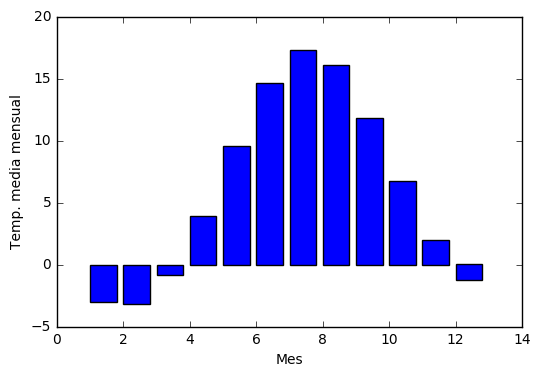

In [72]:
months = arange(1,13)
monthly_mean = [mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Mes")
ax.set_ylabel("Temp. media mensual");

### Cálculos con datos de datos multi-dimensionales 

Cuando funciones como `min`, `max`, etc. se aplican a arrays multidimensionales, algunas veces resulta útil aplicar dichos cálculos al array entero, o a veces sólo por filas o columnas. Usando el argumento `axis` podremos especificar cómo deberán actuar estas funciones: 

In [73]:
m = random.rand(3,3)
m

array([[ 0.65868835,  0.51043521,  0.5812415 ],
       [ 0.74064839,  0.58020847,  0.08493064],
       [ 0.85547823,  0.88075085,  0.01690363]])

In [74]:
# máximo global
m.max()

0.88075085226510552

In [75]:
# máximo en cada columna
m.max(axis=0)

array([ 0.85547823,  0.88075085,  0.5812415 ])

In [76]:
# máximo en cada fila
m.max(axis=1)

array([ 0.65868835,  0.74064839,  0.88075085])

Otras muchas funciones y métodos en las clases `array` y `matrix` aceptan esta misma palabra clave (opcional) `axis`.

## Reestructurando (reshaping, resizing) y apilando (stacking) arrays

La forma (shape) de un array de Numpy puede modificarse sin necesidad de volver a copiar los datos que contiene, resultando una rápida operación, incluso para grandes arrays.

In [77]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [78]:
n, m = A.shape

In [79]:
B = A.reshape((1,n*m))
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
        32, 33, 34, 40, 41, 42, 43, 44]])

In [80]:
B[0,0:5] = 5 # modifica el array

B

array([[ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
        32, 33, 34, 40, 41, 42, 43, 44]])

In [81]:
A # y la variable original también se cambia. 
# B es simplemente una vista diferente de los mismoa datos

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

También podemos usar la función `flatten` para convertir un cierto array multi-dimensional en un vector. Pero esta función crea previamente una copia de los datos.

In [82]:
B = A.flatten()

B

array([ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [83]:
B[0:5] = 10

B

array([10, 10, 10, 10, 10, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [ ]:
A # ahora A no ha cambiado, ya que los datos de B son una copia
# de los de A, y nos se refieren a los mismos datos

## Añadiendo una nueva dimensión con `newaxis'

Con `newaxis`, podemos insertar nuevas dimensiones en un array, por ejemplo convertir un vector en una columna o fila de una matriz:

In [84]:
v = array([1,2,3])

In [85]:
shape(v)

(3,)

In [86]:
# así hacemos una columna matricial del vector v
v[:, newaxis]

array([[1],
       [2],
       [3]])

In [87]:
# columna matricial
v[:,newaxis].shape

(3, 1)

In [88]:
# fila matricial
v[newaxis,:].shape

(1, 3)

## Apilando (stacking) y repitiendo (repeating) arrays

Usando las funciones `repeat`, `tile`, `vstack`, `hstack`, y `concatenate` podremos crear vectores y matrices más grandes a partir de otros más pequeños:

### Apilando (`tile`) y repitiendo  (`repeat`)

In [89]:
a = array([[1, 2], [3, 4]])

In [90]:
# repite cada elemento 3 veces
repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [91]:
# apilar la matriz 3 veces 
tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

### Concatenar (`concatenate`)

In [92]:
b = array([[5, 6]])

In [93]:
concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [94]:
concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### hstack and vstack

In [95]:
vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [96]:
hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Copiar (`copy`) y copia profunda ("deep copy")

Para alcanzar una gran eficacia, las asignaciones en Python usualmente no copian los objetos implicados. Esto es importante por ejemplo cuando dichos objetos son intercambiados entre funciones, para evitar usar una excesiva cantidad de memoria copiando dichos datos cuando no sea necesario (en términos técnicosse dice que los argumentos son pasados por referencia). 

In [27]:
A = array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [28]:
# ahora B se está refiriendo a los mismos datos que A 
B = A 

In [29]:
# por lo tanto cambiar B afecta a  A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [30]:
A

array([[10,  2],
       [ 3,  4]])

Si queremos evitar este comportamiento, de manera que obtengamos una copia nueva de dichos datos completamente independiente `B` de `A`, entonces necesitaremos realizar lo que se denomina una copia profunda ("deep copy") usando la función `copy`:

In [31]:
B = copy(A)

In [32]:
# Ahora, si modificamos B, A no se verá afectada
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [33]:
A

array([[10,  2],
       [ 3,  4]])

## Iterando sobre los elementos del array

Generalmente, queremos evitar el tener que iterar sobre los elementos de los arrays siempre que sea posible (a toda costa). La razón es que en un lenguaje interpretado como Python (o MATLAB), las iteraciones son realmente lentas comparadas con las operaciones vectorizadas. 

Sin embargo, a veces dichas iteraciones son inevitables. Y para dichos casos, el bucle de Python `for` sería el más conveniente para iterar sobre un array:

In [34]:
v = array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [97]:
M = array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


Cuando necesitamos iterar sobre cada elemento de un array y modificar sus elementos, es conveniente usar la función `enumerate`  para obtener tanto el elemento y su índice en el bucle `for`: 

In [36]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # actualiza la matriz M: elevando al cuadrado cada elemento
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [37]:
# cada elemento de M es ahora elevado al cuadrado
M

array([[ 1,  4],
       [ 9, 16]])

## Funciones vectorizadas

Como hemos mencionado varias veces hasta ahora, para obtener una buena eficiencia computacional deberíamos de evitar tener que recorrer los elementos en nuestros vectores y matrices, sino más bien usar algoritmos vectorizados. El primer paso para convertir un algoritmo escalar en uno vectorial es asegurarse de que la función que escribimos funcione bien con entradas vectoriales.

In [38]:
def Theta(x):
    """
    Implementación escalar de la función salto de Heaviside.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [41]:
# Theta(array([-3,-2,-1,0,1,2,3])) esto no funcionaría

OK, esto no funciona porque no hemos definido la función `Theta` como para que pueda gestionar una entrada vectorial... 

Para obtener una versión vectorizada de la función Theta podremos usar la función de Numpy `vectorize`. En muchos casos podrá vectorizar automáticamente la función:

In [42]:
Theta_vec = vectorize(Theta)

In [43]:
Theta_vec(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

También podemos implementar la función para que acepte una entrada vectorial desde el comienzo (requiere algo más de esfuerzo pero puede proporcionar incluso mejores resultados):

In [44]:
def Theta(x):
    """
    Implementación vectorial de la función salto de Heaviside.
    """
    return 1 * (x >= 0)

In [45]:
Theta(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [46]:
# también funciona para escalares
Theta(-1.2), Theta(2.6)

(0, 1)

## Usando arrays en condicionales

Cuando se usan arrays en órdenes condicionales, como por ejemplo con `if` y otras expresiones booleanas, se necesitará usar `any` o `all`, que a su vez requiere que alguno o todos los elementos en el array sea cierto  (`True`):

In [48]:
M

array([[ 1,  4],
       [ 9, 16]])

In [47]:
if (M > 5).any():
    print("al menos uno de los elementos en M es mayor que 5")
else:
    print("ningún elemento en M es mayor que 5")

al menos uno de los elementos en M es mayor que 5


In [50]:
if (M > 5).all():
    print("todos los elementos en M son mayores que 5")
else:
    print("todos los elementos en M no son mayores que 5")

todos los elementos en M no son mayores que 5


## Cambio de tipo de arrays

Ya que los arrays de Numpy sí que son *tipados estáticamente*, el tipo de uno de estos arrays no cambiará una vez creado. No obstante podríamos cambiar explícitamente el tipo de un array de un cierto tipo a otro, usando las funciones `astype`  (consultar también la función similar `asarray`). Esto creará un nuevo array del nuevo tipo indicado:

In [98]:
M.dtype

dtype('int64')

In [99]:
M2 = M.astype(float)

M2

array([[ 1.,  2.],
       [ 3.,  4.]])

In [100]:
M2.dtype

dtype('float64')

In [101]:
M3 = M.astype(bool)

M3

array([[ True,  True],
       [ True,  True]], dtype=bool)

## Lecturas adicionales 

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.

## Versiones

In [102]:
%reload_ext version_information

%version_information numpy

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.1.0
OS Darwin 14.5.0 x86_64 i386 64bit
numpy 1.11.1
Mon Oct 23 23:00:30 2017 CEST